In [1]:
import numpy as np 
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split 
import matplotlib.pyplot as plt

In [2]:
x = 6 * np.random.rand(200, 1) - 3
y =  0.8 * x**2 + 0.9 * x + 2 + np.random.randn(200, 1)

# y = 0.7x^3 +  0.8x^2 +  0.9x + noise 

In [3]:
x.shape,y.shape

((200, 1), (200, 1))

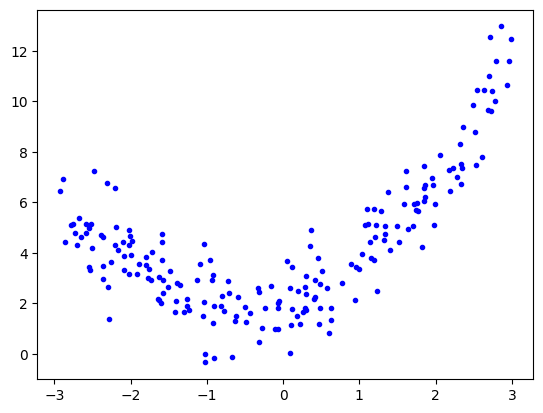

In [4]:
plt.plot(x,y,"b.")
plt.show()

In [5]:
x_train,x_test,y_train,y_test =  train_test_split(x,y,test_size=0.2,random_state=42)

In [6]:
x_train.shape,y_train.shape

((160, 1), (160, 1))

#### model building without effect 

In [7]:
model = LinearRegression()
model.fit(x_train,y_train)
r2_score(y_test,model.predict(x))

0.28556505384891995

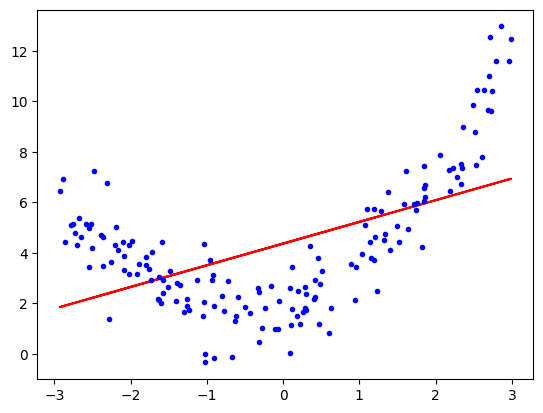

In [8]:
plt.plot(x_train,model.predict(x_train),color='red')
plt.plot(x_train,y_train,"b.")
plt.show()

In [9]:
model.coef_,model.intercept_

(array([[0.8591483]]), array([4.36082499]))

#### Model building with polynomial features 

In [21]:
poly =  PolynomialFeatures(degree=2,include_bias=True)
x_train_new  = poly.fit_transform(x_train)
x_test_new  = poly.transform(x_test)

In [27]:
x_train_new[0],x_train[0]

(array([1.        , 1.20393572, 1.44946123]), array([1.20393572]))

In [22]:
x_train_new.shape

(160, 3)

In [23]:
model_ = LinearRegression()
model_.fit(x_train_new,y_train)
r2_score(y_test,model_.predict(x_test_new))

0.7519761263251556

In [28]:
x_new = np.linspace(-3,3,200).reshape(200,1)
x_new_trans  = poly.transform(x_new)
y_pred  =  model_.predict(x_new_trans)

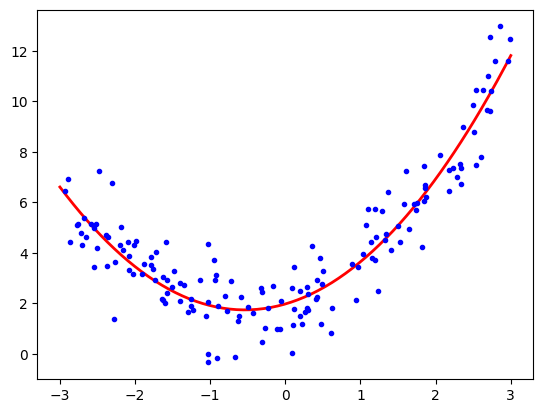

In [29]:
plt.plot(x_new,model_.predict(x_new_trans),linewidth=2,color='red')
plt.plot(x_train,y_train,"b.")
plt.show()

In [30]:
model_.coef_,model.intercept_

(array([[0.        , 0.86773185, 0.80376906]]), array([4.36082499]))